In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import re

In [2]:
brand = []
model = []
price = []
power_consumption = []
warranty = []
room_size = []
rating = []
ton = []

In [3]:
for i in range(1,5):
    Flipkart_URLS = "https://www.flipkart.com/search?q=air%20conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"+str(i)
    print(Flipkart_URLS)
    
    page = requests.get(Flipkart_URLS)
    soup = BeautifulSoup(page.text)
    
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")
    
    for i in p:
        price.append(i.text)
    
    data = soup.find_all("div",class_="_4rR01T")
    
    for i in data:
        brand.append(i.text.split()[0])
        
    for i in data:
        model.append(i.text.split('-')[0])
        
    features = soup.find_all("li",class_="rgWa7D") 
    
    for i in features:
        a = i.text
        b = re.findall(r"Power\sConsumption:(.\d+)",a)
        if len(b)>0:
            power_consumption.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\bRoom\sSize:(.\d+)",a)
        if len(b)>0:
            room_size.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\b([1-10]{1})\s\w+.*",a)
        if len(b)>0:
            warranty.append(b[0])
            
    for i in soup.find_all("div",class_="_2kHMtA"):
        a=i.find("div",class_="_3LWZlK")
        if a:
            rating.append(a.text)
        else:
            rating.append(np.nan)
            
    for i in data:
        a= i.text
        b = re.findall(r"(\d?\.?\d?)\s?Ton",a)
        if b:
            ton.append(b[0])
        else:
            ton.append(np.nan)
            
            
    print("brand-----",len(brand))
    print("model-----",len(model))
    print("price-----",len(price))
    print("power_consumption-----",len(power_consumption))
    print("room_size-----",len(room_size))
    print("warranty-----",len(warranty))
    print("rating-----",len(rating))

https://www.flipkart.com/search?q=air%20conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off1
brand----- 24
model----- 24
price----- 24
power_consumption----- 24
room_size----- 24
warranty----- 24
rating----- 24
https://www.flipkart.com/search?q=air%20conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off2
brand----- 48
model----- 48
price----- 48
power_consumption----- 48
room_size----- 48
warranty----- 49
rating----- 48
https://www.flipkart.com/search?q=air%20conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off3
brand----- 72
model----- 72
price----- 72
power_consumption----- 72
room_size----- 72
warranty----- 74
rating----- 72
https://www.flipkart.com/search?q=air%20conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off4
brand----- 96
model----- 96
price----- 96
power_consumption----- 96
room_size----- 96
warranty----- 99
rating----- 96


In [4]:
Dictionary_1 = {"Brand":brand,
                "Model":model,
                "Power_Consumption_kWh":power_consumption,
                "Room_Size_sqft":room_size,
                "Warranty_Years":warranty,
                "Price":price,
                "Rating":rating,
                "Ton":ton}

In [6]:
# Find the maximum length among all arrays
max_length = max(len(v) for v in Dictionary_1.values())

#  arrays with None to match the maximum length
for key, value in Dictionary_1.items():
    if len(value) < max_length:
        Dictionary_1[key] += [None] * (max_length - len(value))


In [7]:
Data_Frame_1 = pd.DataFrame(Dictionary_1)

In [35]:
Data_Frame_1

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,Daikin,Daikin 1.5 Ton 3 Star Split Inverter AC with P...,1670,111,1,"₹41,500",4.2,1.5
1,CARRIER,"CARRIER 2 Ton 3 Star Split Auto Cleanser, Dual...",1665,151,1,"₹48,999",4.3,2
2,SAMSUNG,SAMSUNG Convertible 5,481,90,1,"₹38,390",4,1
3,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,1002,111,1,"₹35,490",4.2,1.5
4,LG,LG Super Convertible 5,1015,111,1,"₹47,990",4.2,1.5
...,...,...,...,...,...,...,...,...
91,SAMSUNG,SAMSUNG Convertible 5,None,90,None,"₹33,400",4,1
92,Blue,Blue Star 1 Ton 3 Star Split Inverter AC,None,90,None,"₹35,599",3.8,1
93,Lloyd,Lloyd 1.5 Ton 5 Star Window Inverter AC,None,111,None,"₹53,199",4.1,1.5
94,Daikin,Daikin 1.8 Ton 4 Star Split Inverter AC,None,151,None,"₹32,990",3.8,1.8


In [8]:
brand = []
model = []
price = []
power_consumption = []
warranty = []
room_size = []
rating = []
ton = []

In [9]:
for i in range(5,9):
    Flipkart_URLS = "https://www.flipkart.com/search?q=air%20conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"+str(i)
    print(Flipkart_URLS)
    
    page = requests.get(Flipkart_URLS)
    soup = BeautifulSoup(page.text)
    
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")
    
    for i in p:
        price.append(i.text)
    
    data = soup.find_all("div",class_="_4rR01T")
    
    for i in data:
        brand.append(i.text.split()[0])
        
    for i in data:
        model.append(i.text.split('-')[0])
        
    features = soup.find_all("li",class_="rgWa7D") 
    
    for i in features:
        a = i.text
        b = re.findall(r"Power\sConsumption:(.\d+)",a)
        if len(b)>0:
            power_consumption.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\bRoom\sSize:(.\d+)",a)
        if len(b)>0:
            room_size.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\b([1-10]{1})\s\w+.*",a)
        if len(b)>0:
            warranty.append(b[0])
            
    for i in soup.find_all("div",class_="_2kHMtA"):
        a=i.find("div",class_="_3LWZlK")
        if a:
            rating.append(a.text)
        else:
            rating.append(np.nan)
            
    for i in data:
        a= i.text
        b = re.findall(r"(\d?\.?\d?)\s?Ton",a)
        if b:
            ton.append(b[0])
        else:
            ton.append(np.nan)
            
            
    print("brand-----",len(brand))
    print("model-----",len(model))
    print("price-----",len(price))
    print("power_consumption-----",len(power_consumption))
    print("room_size-----",len(room_size))
    print("warranty-----",len(warranty))
    print("rating-----",len(rating))

https://www.flipkart.com/search?q=air%20conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off5
brand----- 24
model----- 24
price----- 24
power_consumption----- 24
room_size----- 24
warranty----- 25
rating----- 24
https://www.flipkart.com/search?q=air%20conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off6
brand----- 48
model----- 48
price----- 48
power_consumption----- 48
room_size----- 48
warranty----- 49
rating----- 48
https://www.flipkart.com/search?q=air%20conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off7
brand----- 72
model----- 72
price----- 72
power_consumption----- 72
room_size----- 72
warranty----- 74
rating----- 72
https://www.flipkart.com/search?q=air%20conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off8
brand----- 96
model----- 96
price----- 96
power_consumption----- 96
room_size----- 96
warranty----- 98
rating----- 96


In [10]:
Dictionary_2 = {"Brand":brand,
                "Model":model,
                "Power_Consumption_kWh":power_consumption,
                "Room_Size_sqft":room_size,
                "Warranty_Years":warranty,
                "Price":price,
                "Rating":rating,
                "Ton":ton}

In [12]:
# Find the maximum length among all arrays
max_length = max(len(v) for v in Dictionary_2.values())

#  arrays with None to match the maximum length
for key, value in Dictionary_2.items():
    if len(value) < max_length:
        Dictionary_2[key] += [None] * (max_length - len(value))


In [13]:
Data_Frame_2 = pd.DataFrame(Dictionary_2)

In [44]:
Data_Frame_2

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,Daikin,Daikin 1.5 Ton 3 Star Split Inverter AC with P...,1670,111,1,"₹41,500",4.2,1.5
1,CARRIER,"CARRIER 2 Ton 3 Star Split Auto Cleanser, Dual...",1665,151,1,"₹48,999",4.3,2
2,SAMSUNG,SAMSUNG Convertible 5,481,90,1,"₹38,390",4,1
3,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,1002,111,1,"₹35,490",4.2,1.5
4,LG,LG Super Convertible 5,1015,111,1,"₹47,990",4.2,1.5
...,...,...,...,...,...,...,...,...
189,MarQ,MarQ by Flipkart 2023 Range 1 Ton 3 Star Split...,1115,90,1,"₹26,499",4.1,1
190,SAMSUNG,SAMSUNG 1.5 Ton 4 Star Split Inverter AC,850,111,1,"₹35,999",3.8,1.5
191,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521,90,1,"₹27,999",4.2,0.8
192,None,None,None,None,1,None,None,None


In [15]:
brand = []
model = []
price = []
power_consumption = []
warranty = []
room_size = []
rating = []
ton = []

In [16]:
for i in range(9,13):
    Flipkart_URLS = """https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page="""+str(i)
    print(Flipkart_URLS)
    
    page = requests.get(Flipkart_URLS)
    soup = BeautifulSoup(page.text)
    
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")

    for i in p:
        price.append(i.text)
    
    data = soup.find_all("div",class_="_4rR01T")
    
    for i in data:
        brand.append(i.text.split()[0])
        
    for i in data:
        model.append(i.text.split('-')[0])
        
    features = soup.find_all("li",class_="rgWa7D")
    
    for i in features:
        a = i.text
        b = re.findall(r"Power\sConsumption:(.\d+)",a)
        if len(b)>0:
            power_consumption.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\bRoom\sSize:(.\d+)",a)
        if len(b)>0:
            room_size.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\b([1-10]{1})\s\w+.*",a)
        if len(b)>0:
            warranty.append(b[0])
            
    for i in soup.find_all("div",class_="_2kHMtA"):
        a=i.find("div",class_="_3LWZlK")
        if a:
            rating.append(a.text)
        else:
            rating.append(np.nan)
            
    for i in data:
        a= i.text
        b = re.findall(r"(\d?\.?\d?)\s?Ton",a)
        if b:
            ton.append(b[0])
        else:
            ton.append(np.nan)
            
            
    print("brand-----",len(brand))
    print("model-----",len(model))
    print("price-----",len(price))
    print("power_consumption-----",len(power_consumption))
    print("room_size-----",len(room_size))
    print("warranty-----",len(warranty))
    print("rating-----",len(rating))
    print("ton-----",len(ton))

https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=9
brand----- 24
model----- 24
price----- 24
power_consumption----- 24
room_size----- 24
warranty----- 24
rating----- 24
ton----- 24
https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=10
brand----- 48
model----- 48
price----- 48
power_consumption----- 48
room_size----- 48
warranty----- 48
rating----- 48
ton----- 48
https://www.flipkart.com/search?q=air+c

In [17]:
Dictionary_3 = {"Brand":brand,
                "Model":model,
                "Power_Consumption_kWh":power_consumption,
                "Room_Size_sqft":room_size,
                "Warranty_Years":warranty,
                "Price":price,
                "Rating":rating,
                "Ton":ton}

In [19]:
# Find the maximum length among all arrays
max_length = max(len(v) for v in Dictionary_3.values())

#  arrays with None to match the maximum length
for key, value in Dictionary_3.items():
    if len(value) < max_length:
        Dictionary_3[key] += [None] * (max_length - len(value))


In [20]:
Data_Frame_3 = pd.DataFrame(Dictionary_3)

In [26]:
Data_Frame_3

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,Daikin,Daikin 1.5 Ton 3 Star Split Inverter AC with P...,1670,111,1,"₹41,500",4.2,1.5
1,CARRIER,"CARRIER 2 Ton 3 Star Split Auto Cleanser, Dual...",1665,151,1,"₹48,999",4.3,2
2,SAMSUNG,SAMSUNG Convertible 5,481,90,1,"₹38,390",4,1
3,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,1002,111,1,"₹35,490",4.2,1.5
4,LG,LG Super Convertible 5,1015,111,1,"₹47,990",4.2,1.5
...,...,...,...,...,...,...,...,...
91,SAMSUNG,SAMSUNG Convertible 5,None,90,None,"₹33,400",4,1
92,Blue,Blue Star 1 Ton 3 Star Split Inverter AC,None,90,None,"₹35,599",3.8,1
93,Lloyd,Lloyd 1.5 Ton 5 Star Window Inverter AC,None,111,None,"₹53,199",4.1,1.5
94,Daikin,Daikin 1.8 Ton 4 Star Split Inverter AC,None,151,None,"₹32,990",3.8,1.8


In [21]:
brand = []
model = []
price = []
power_consumption = []
warranty = []
room_size = []
rating = []
ton = []

In [22]:
for i in range(13,18):
    Flipkart_URLS = """https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page="""+str(i)
    print(Flipkart_URLS)
    
    page = requests.get(Flipkart_URLS)
    soup = BeautifulSoup(page.text)
    
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")

    for i in p:
        price.append(i.text)
    
    data = soup.find_all("div",class_="_4rR01T")
    
    for i in data:
        brand.append(i.text.split()[0])
        
    for i in data:
        model.append(i.text.split('-')[0])
        
    features = soup.find_all("li",class_="rgWa7D")
    
    for i in features:
        a = i.text
        b = re.findall(r"Power\sConsumption:(.\d+)",a)
        if len(b)>0:
            power_consumption.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\bRoom\sSize:(.\d+)",a)
        if len(b)>0:
            room_size.append(b[0])
            
    for i in features:
        a = i.text
        b = re.findall(r"\b([1-10]{1})\s\w+.*",a)
        if len(b)>0:
            warranty.append(b[0])
            
    for i in soup.find_all("div",class_="_2kHMtA"):
        a=i.find("div",class_="_3LWZlK")
        if a:
            rating.append(a.text)
        else:
            rating.append(np.nan)
            
    for i in data:
        a= i.text
        b = re.findall(r"(\d?\.?\d?)\s?Ton",a)
        if b:
            ton.append(b[0])
        else:
            ton.append(np.nan)
            
            
    print("brand-----",len(brand))
    print("model-----",len(model))
    print("price-----",len(price))
    print("power_consumption-----",len(power_consumption))
    print("room_size-----",len(room_size))
    print("warranty-----",len(warranty))
    print("rating-----",len(rating))
    print("ton-----",len(ton))

https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=13
brand----- 24
model----- 24
price----- 24
power_consumption----- 21
room_size----- 24
warranty----- 21
rating----- 24
ton----- 24
https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=de2999d1-3a58-4a01-904f-6f9b67fa7bdb&as-searchtext=air+condi&page=14
brand----- 48
model----- 48
price----- 48
power_consumption----- 44
room_size----- 47
warranty----- 44
rating----- 48
ton----- 48
https://www.flipkart.com/search?q=air+

In [23]:
Dictionary_4 = {"Brand":brand,
                "Model":model,
                "Power_Consumption_kWh":power_consumption,
                "Room_Size_sqft":room_size,
                "Warranty_Years":warranty,
                "Price":price,
                "Rating":rating,
                "Ton":ton}

In [25]:
# Find the maximum length among all arrays
max_length = max(len(v) for v in Dictionary_4.values())

#  arrays with None to match the maximum length
for key, value in Dictionary_4.items():
    if len(value) < max_length:
        Dictionary_4[key] += [None] * (max_length - len(value))

In [26]:
# Create the DataFrame
Data_Frame_4 = pd.DataFrame(Dictionary_4)

In [154]:
Data_Frame_4

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,Midea,Midea 1.5 Ton 3 Star Split Inverter AC,1700,111,1,"₹35,999",4.1,1.5
1,LG,LG Super Convertible 5,1230,151,1,"₹63,490",4.2,2
2,Blue,Blue Star 1 Ton 5 Star Split Inverter AC,1002,90,1,"₹39,990",4.5,1
3,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,1495,111,1,"₹35,490",4.2,1.5
4,Hitachi,Hitachi 1.5 Ton 3 Star Split AC,688,111,1,"₹36,999",4,1.5
...,...,...,...,...,...,...,...,...
115,Panasonic,Panasonic Convertible 7,3850,151,None,"₹43,999",4.1,1.5
116,Haier,Haier UVC Sterilization 2023 Model 1.6 Ton 5 S...,1440,90,None,"₹51,750",NaN,1.6
117,Whirlpool,Whirlpool 1 Ton 5 Star Split Inverter AC,None,90,None,"₹37,799",4.2,1
118,LG,LG 1 Ton 4 Star Split Inverter AC,None,111,None,"₹52,990",NaN,1


# Creating the  DataFrame

In [27]:
df1 = pd.concat([Data_Frame_1,Data_Frame_2],axis=0)

In [28]:
df2 = pd.concat([Data_Frame_3,Data_Frame_4],axis=0)

In [29]:
Final_Data_Frame = pd.concat([df1,df2],axis=0)

In [30]:
Final_Data_Frame

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,1002,111,1,"₹35,490",4.2,1.5
1,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521,90,1,"₹27,999",4.2,0.8
2,MarQ,MarQ by Flipkart 2023 Range 1.5 Ton 3 Star Spl...,1620,111,1,"₹28,499",4,1.5
3,Whirlpool,Whirlpool Convertible 4,963,111,1,"₹31,990",3.9,1.5
4,Lloyd,Lloyd 1.5 Ton 3 Star Split Inverter AC,1002,111,1,"₹32,990",4.3,1.5
...,...,...,...,...,...,...,...,...
115,LG,LG 1.5 Ton 3 Star Window Dual Inverter AC with Wi,624,111,None,"₹53,899",3.9,1.5
116,Panasonic,Panasonic 1.5 Ton 3 Star Split Inverter AC,None,151,None,"₹35,739",NaN,1.5
117,Daikin,Daikin 1.8 Ton 3 Star Hot and Cold Split Inver...,None,111,None,"₹30,999",4.2,1.8
118,Haier,Haier Top Flow 1.5 Ton 3 Star Window Jet Air F...,None,90,None,None,NaN,1.5


# To CSV File

In [31]:
file_path = 'C:/Users/siraj/Downloads/air_conditioners_project.csv'

Final_Data_Frame.to_csv(file_path, index=False)

In [4]:
import pandas as pd
import numpy as np


In [5]:
Data_Frame = pd.read_csv(r'C:/Users/siraj/Downloads/air_conditioners_project.csv')

In [6]:
Data_Frame

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,1002.0,111.0,1.0,"₹35,490",4.2,1.5
1,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.0,90.0,1.0,"₹27,999",4.2,0.8
2,MarQ,MarQ by Flipkart 2023 Range 1.5 Ton 3 Star Spl...,1620.0,111.0,1.0,"₹28,499",4.0,1.5
3,Whirlpool,Whirlpool Convertible 4,963.0,111.0,1.0,"₹31,990",3.9,1.5
4,Lloyd,Lloyd 1.5 Ton 3 Star Split Inverter AC,1002.0,111.0,1.0,"₹32,990",4.3,1.5
...,...,...,...,...,...,...,...,...
408,LG,LG 1.5 Ton 3 Star Window Dual Inverter AC with Wi,624.0,111.0,NaN,"₹53,899",3.9,1.5
409,Panasonic,Panasonic 1.5 Ton 3 Star Split Inverter AC,NaN,151.0,NaN,"₹35,739",NaN,1.5
410,Daikin,Daikin 1.8 Ton 3 Star Hot and Cold Split Inver...,NaN,111.0,NaN,"₹30,999",4.2,1.8
411,Haier,Haier Top Flow 1.5 Ton 3 Star Window Jet Air F...,NaN,90.0,NaN,NaN,NaN,1.5


# Data Cleaning

In [7]:
Data_Frame


,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,1002.0,111.0,1.0,"₹35,490",4.2,1.5
1,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.0,90.0,1.0,"₹27,999",4.2,0.8
2,MarQ,MarQ by Flipkart 2023 Range 1.5 Ton 3 Star Spl...,1620.0,111.0,1.0,"₹28,499",4.0,1.5
3,Whirlpool,Whirlpool Convertible 4,963.0,111.0,1.0,"₹31,990",3.9,1.5
4,Lloyd,Lloyd 1.5 Ton 3 Star Split Inverter AC,1002.0,111.0,1.0,"₹32,990",4.3,1.5
...,...,...,...,...,...,...,...,...
408,LG,LG 1.5 Ton 3 Star Window Dual Inverter AC with Wi,624.0,111.0,NaN,"₹53,899",3.9,1.5
409,Panasonic,Panasonic 1.5 Ton 3 Star Split Inverter AC,NaN,151.0,NaN,"₹35,739",NaN,1.5
410,Daikin,Daikin 1.8 Ton 3 Star Hot and Cold Split Inver...,NaN,111.0,NaN,"₹30,999",4.2,1.8
411,Haier,Haier Top Flow 1.5 Ton 3 Star Window Jet Air F...,NaN,90.0,NaN,NaN,NaN,1.5


In [8]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  408 non-null    object 
 1   Model                  408 non-null    object 
 2   Power_Consumption_kWh  397 non-null    float64
 3   Room_Size_sqft         406 non-null    float64
 4   Warranty_Years         401 non-null    float64
 5   Price                  405 non-null    object 
 6   Rating                 355 non-null    float64
 7   Ton                    408 non-null    float64
dtypes: float64(5), object(3)
memory usage: 25.9+ KB


In [9]:
Data_Frame.shape

(413, 8)

In [10]:
Data_Frame['Power_Consumption_kWh'].fillna("1103.39",inplace=True)
Data_Frame['Room_Size_sqft'].fillna("108.39",inplace=True)
Data_Frame['Warranty_Years'].fillna("1",inplace=True)
Data_Frame['Price'].fillna("32990",inplace=True)
Data_Frame['Rating'].fillna("4.0",inplace=True)
Data_Frame['Ton'].fillna("1.0",inplace=True)
Data_Frame['Brand'].fillna("SAMSUNG",inplace=True)
Data_Frame['Model'].fillna("SAMSUNG Convertible 5",inplace=True)


In [11]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Brand                  413 non-null    object
 1   Model                  413 non-null    object
 2   Power_Consumption_kWh  413 non-null    object
 3   Room_Size_sqft         413 non-null    object
 4   Warranty_Years         413 non-null    object
 5   Price                  413 non-null    object
 6   Rating                 413 non-null    object
 7   Ton                    413 non-null    object
dtypes: object(8)
memory usage: 25.9+ KB


In [12]:
Data_Frame['Price'] = Data_Frame['Price'].str.replace("₹", "").str.replace(",", "")


In [13]:
Data_Frame['Price']

0      35490
1      27999
2      28499
3      31990
4      32990
       ...  
408    53899
409    35739
410    30999
411    32990
412    32990
Name: Price, Length: 413, dtype: object

In [14]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Brand                  413 non-null    object
 1   Model                  413 non-null    object
 2   Power_Consumption_kWh  413 non-null    object
 3   Room_Size_sqft         413 non-null    object
 4   Warranty_Years         413 non-null    object
 5   Price                  413 non-null    object
 6   Rating                 413 non-null    object
 7   Ton                    413 non-null    object
dtypes: object(8)
memory usage: 25.9+ KB


In [15]:
Data_Frame.isnull().sum()
# There are no null values

Brand                    0
Model                    0
Power_Consumption_kWh    0
Room_Size_sqft           0
Warranty_Years           0
Price                    0
Rating                   0
Ton                      0
dtype: int64

In [16]:
Data_Frame

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,1002.0,111.0,1.0,35490,4.2,1.5
1,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.0,90.0,1.0,27999,4.2,0.8
2,MarQ,MarQ by Flipkart 2023 Range 1.5 Ton 3 Star Spl...,1620.0,111.0,1.0,28499,4.0,1.5
3,Whirlpool,Whirlpool Convertible 4,963.0,111.0,1.0,31990,3.9,1.5
4,Lloyd,Lloyd 1.5 Ton 3 Star Split Inverter AC,1002.0,111.0,1.0,32990,4.3,1.5
...,...,...,...,...,...,...,...,...
408,LG,LG 1.5 Ton 3 Star Window Dual Inverter AC with Wi,624.0,111.0,1,53899,3.9,1.5
409,Panasonic,Panasonic 1.5 Ton 3 Star Split Inverter AC,1103.39,151.0,1,35739,4.0,1.5
410,Daikin,Daikin 1.8 Ton 3 Star Hot and Cold Split Inver...,1103.39,111.0,1,30999,4.2,1.8
411,Haier,Haier Top Flow 1.5 Ton 3 Star Window Jet Air F...,1103.39,90.0,1,32990,4.0,1.5


In [17]:
Data_Frame.tail(30)

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
383,Whirlpool,Whirlpool 1.5 Ton 5 Star Split Inverter AC,1236.0,111.0,1.0,36990,4.2,1.5
384,Blue,Blue Star 1.3 Ton 3 Star Split Inverter AC,624.0,90.0,1.0,33490,4.2,1.3
385,Voltas,Voltas 1 Ton 3 Star Split Inverter AC,1096.0,90.0,1.0,31490,4.3,1.0
386,Daikin,Daikin 1 Ton 5 Star Split Inverter AC,1095.0,151.0,1.0,39590,3.7,1.0
387,Hitachi,Hitachi 1.8 Ton 3 Star Split Inverter AC,940.0,90.0,1.0,45999,3.8,1.8
388,SAMSUNG,SAMSUNG Convertible 5,1002.0,151.0,1.0,30999,4.0,1.0
389,Hitachi,Hitachi Ice Clean Frost Wash Technology 2023 M...,1380.0,111.0,1.0,55990,3.9,1.8
390,Daikin,Daikin 1.5 Ton 5 Star Split Inverter AC with P...,611.0,111.0,1.0,62999,4.3,1.5
391,SAMSUNG,SAMSUNG Convertible 1.5 Ton 3 Star Split Inver...,741.0,111.0,1.0,35690,4.3,1.5
392,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,968.0,111.0,1.0,35490,4.2,1.5


In [18]:
Data_Frame['Power_Consumption_kWh'] = Data_Frame['Power_Consumption_kWh'].astype("float")

Data_Frame['Room_Size_sqft'] = Data_Frame['Room_Size_sqft'].astype("float")

Data_Frame['Warranty_Years'] = Data_Frame['Warranty_Years'].astype("float")

Data_Frame['Rating'] = Data_Frame['Rating'].astype("float")

Data_Frame['Ton'] = Data_Frame['Ton'].astype("float")

Data_Frame['Price'] = Data_Frame['Price'].astype("int")

In [19]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  413 non-null    object 
 1   Model                  413 non-null    object 
 2   Power_Consumption_kWh  413 non-null    float64
 3   Room_Size_sqft         413 non-null    float64
 4   Warranty_Years         413 non-null    float64
 5   Price                  413 non-null    int32  
 6   Rating                 413 non-null    float64
 7   Ton                    413 non-null    float64
dtypes: float64(5), int32(1), object(2)
memory usage: 24.3+ KB


# Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
Data_Frame.Brand.unique()

array(['Blue', 'MarQ', 'Whirlpool', 'Lloyd', 'Voltas', 'Panasonic', 'LG',
       'SAMSUNG', 'Godrej', 'realme', 'Daikin', 'CARRIER', 'Thomson',
       'CANDY', 'Hitachi', 'TOSHIBA', 'IFB', 'Haier', 'LIVPURE', 'ONIDA',
       'MOTOROLA', 'O', 'Midea', 'Intex'], dtype=object)

In [22]:
Data_Frame.Brand.nunique() 

24

In [23]:
Data_Frame.Brand.value_counts() ## Which brand has how many ACs?

Brand
Lloyd        59
LG           52
SAMSUNG      50
Blue         45
Whirlpool    37
Panasonic    34
Daikin       25
Voltas       22
realme       17
Hitachi      14
Godrej       14
MarQ         12
CARRIER       8
Haier         6
ONIDA         4
Midea         2
MOTOROLA      2
Thomson       2
TOSHIBA       2
CANDY         2
LIVPURE       1
IFB           1
O             1
Intex         1
Name: count, dtype: int64

In [24]:
Data_Frame.describe()

,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
count,413.000000,413.000000,413.0,413.000000,413.000000,413.000000
mean,1103.233027,108.391598,1.0,36516.169492,4.083051,1.454237
std,494.609746,13.730832,0.0,6748.684705,0.265497,1.190053
min,481.000000,90.000000,1.0,23099.000000,1.000000,0.800000
25%,840.000000,108.390000,1.0,31999.000000,4.000000,1.300000
50%,1002.000000,111.000000,1.0,35490.000000,4.100000,1.500000
75%,1269.000000,111.000000,1.0,39740.000000,4.200000,1.500000
max,5500.000000,151.000000,1.0,62999.000000,5.000000,25.000000


In [25]:
 # Data_Frame["Price"].max()
Data_Frame["Price"].mean()


36516.16949152543

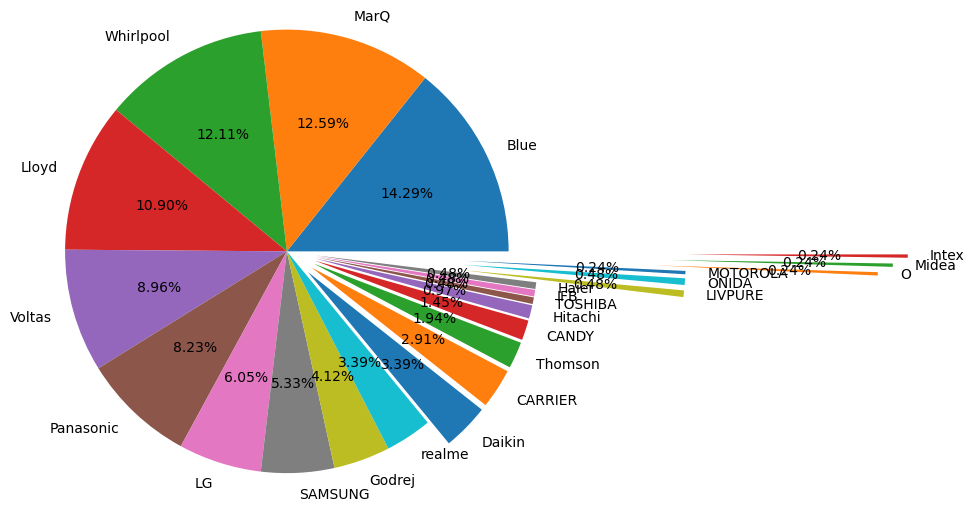

In [62]:
plt.pie(Data_Frame.Brand.value_counts(), labels=Data_Frame.Brand.unique(),autopct="%0.2f%%",radius =1.5,explode =[0,0,0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,1.2,1.2,1.2,2.5,2.6,2.7])
plt.show()

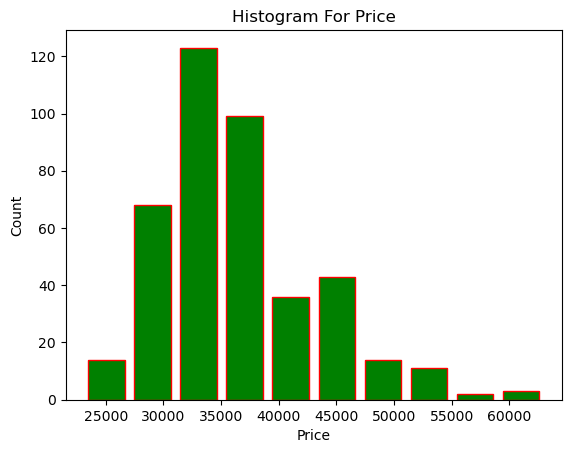

In [27]:

plt.hist(Data_Frame.Price,color="g",edgecolor='r',rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram For Price')
plt.show()

In [28]:
Data_Frame.Rating

0      4.2
1      4.2
2      4.0
3      3.9
4      4.3
      ... 
408    3.9
409    4.0
410    4.2
411    4.0
412    4.0
Name: Rating, Length: 413, dtype: float64

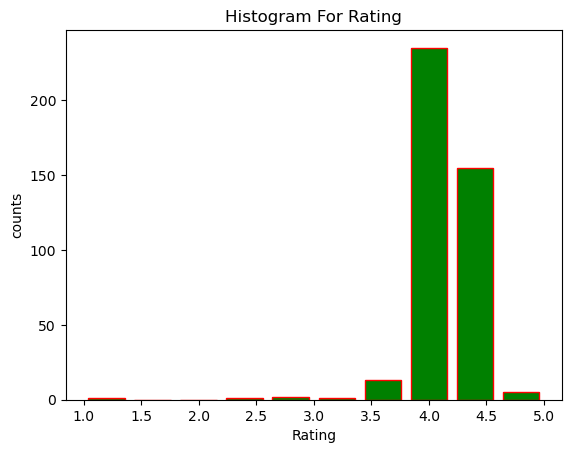

In [29]:
plt.hist(Data_Frame.Rating,color="g",edgecolor="r",rwidth=0.8)
plt.xlabel("Rating")
plt.ylabel("counts")
plt.title("Histogram For Rating")

plt.show()

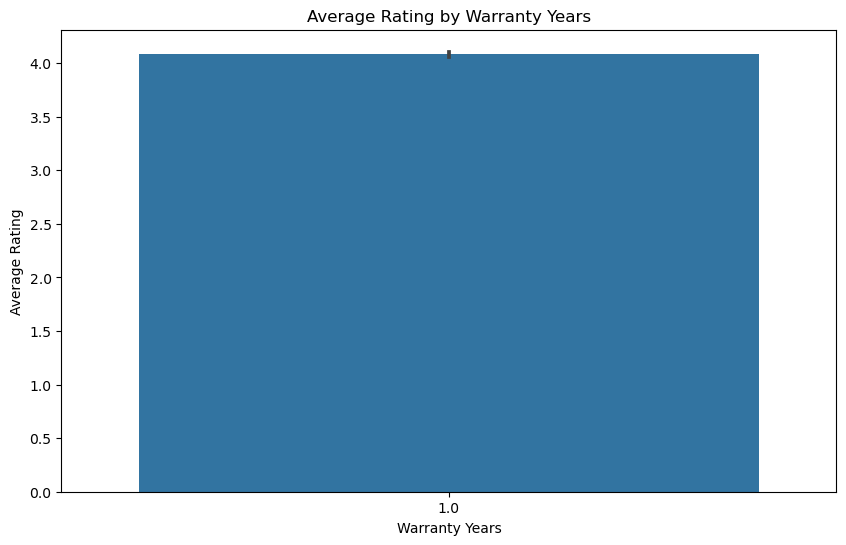

In [30]:
# Average rating by warranty years
plt.figure(figsize=(10, 6))
sns.barplot(data=Data_Frame, x='Warranty_Years', y='Rating')
plt.title('Average Rating by Warranty Years')
plt.xlabel('Warranty Years')
plt.ylabel('Average Rating')
plt.show()

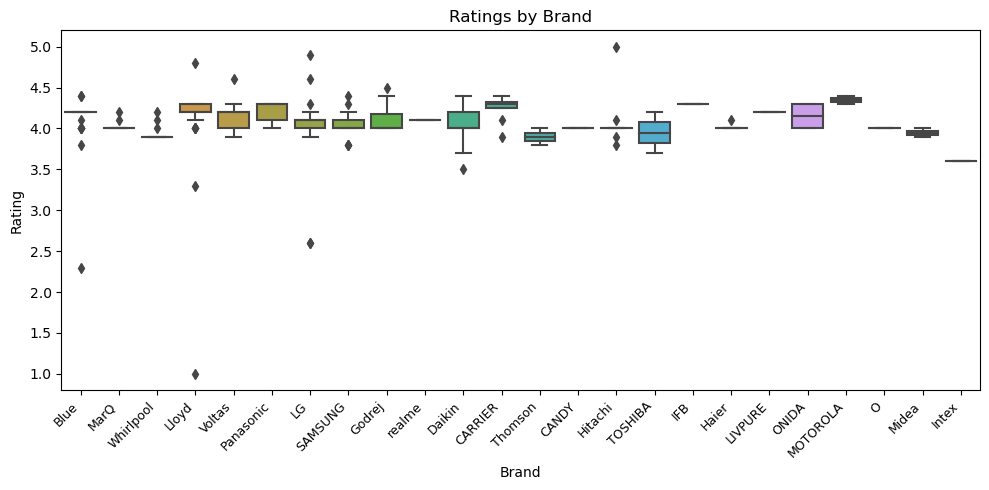

In [63]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=Data_Frame, x='Brand', y='Rating')
plt.title('Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right', fontsize=9) 
plt.tight_layout() 
plt.show()


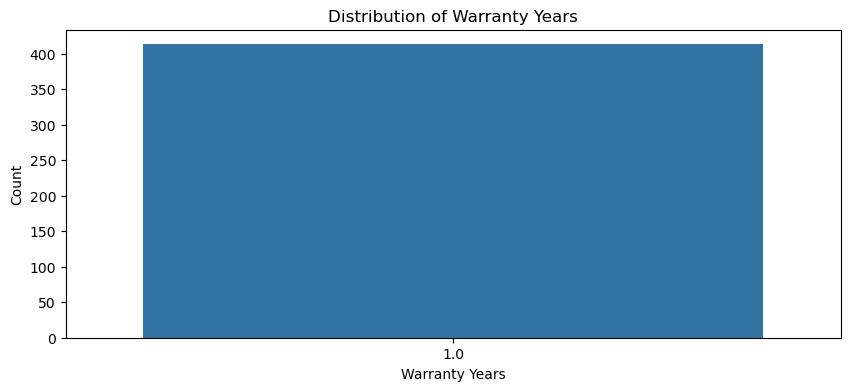

In [64]:
plt.figure(figsize=(10, 4))
sns.countplot(data=Data_Frame, x='Warranty_Years')
plt.title('Distribution of Warranty Years')
plt.xlabel('Warranty Years')
plt.ylabel('Count')
plt.show()


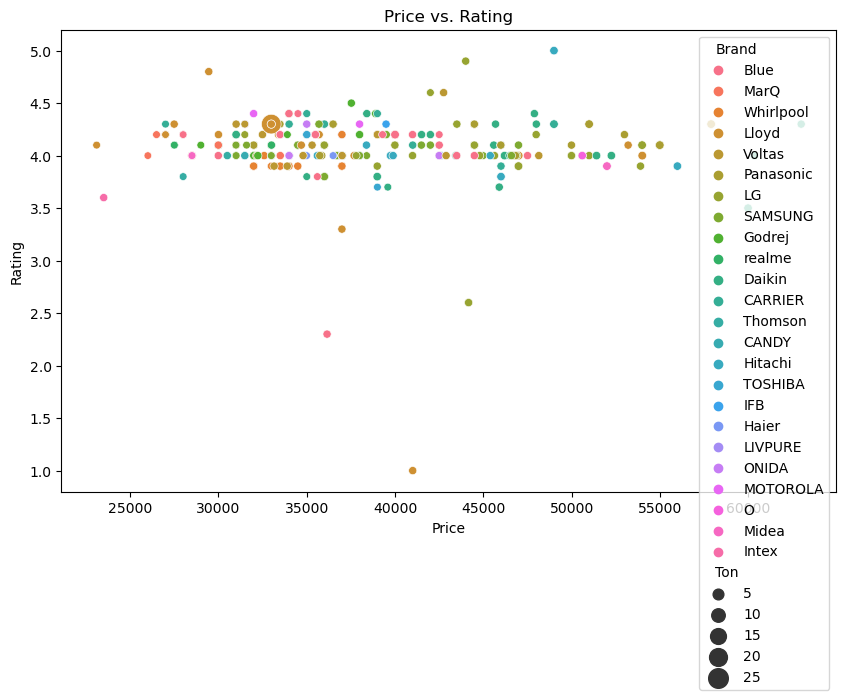

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data_Frame, x='Price', y='Rating', hue='Brand', size='Ton', sizes=(30, 200))
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


In [34]:
Data_Frame[Data_Frame['Price']<=30000]

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
1,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.0,90.0,1.0,27999,4.2,0.8
2,MarQ,MarQ by Flipkart 2023 Range 1.5 Ton 3 Star Spl...,1620.0,111.0,1.0,28499,4.0,1.5
18,realme,realme TechLife 2023 Range 1 Ton 4 Star Split ...,965.0,90.0,1.0,27499,4.1,1.0
20,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
26,MarQ,MarQ by Flipkart 2023 Range 1.5 Ton 3 Star Spl...,1620.0,111.0,1.0,28499,4.0,1.5
42,realme,realme TechLife 2023 Range 1 Ton 4 Star Split ...,965.0,90.0,1.0,27499,4.1,1.0
43,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.0,90.0,1.0,27999,4.2,0.8
44,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
50,MarQ,MarQ by Flipkart 2023 Range 1.5 Ton 3 Star Spl...,1620.0,111.0,1.0,28499,4.0,1.5
67,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.0,90.0,1.0,27999,4.2,0.8


In [35]:
Data_Frame[Data_Frame['Rating']>=4.0]

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,1002.00,111.00,1.0,35490,4.2,1.5
1,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.00,90.00,1.0,27999,4.2,0.8
2,MarQ,MarQ by Flipkart 2023 Range 1.5 Ton 3 Star Spl...,1620.00,111.00,1.0,28499,4.0,1.5
4,Lloyd,Lloyd 1.5 Ton 3 Star Split Inverter AC,1002.00,111.00,1.0,32990,4.3,1.5
5,Voltas,Voltas 1.5 Ton 5 Star Split Inverter AC,751.00,111.00,1.0,38999,4.2,1.5
...,...,...,...,...,...,...,...,...
407,Blue,Blue Star 1.5 Ton 3 Star Split AC,1192.00,111.00,1.0,33990,4.4,1.5
409,Panasonic,Panasonic 1.5 Ton 3 Star Split Inverter AC,1103.39,151.00,1.0,35739,4.0,1.5
410,Daikin,Daikin 1.8 Ton 3 Star Hot and Cold Split Inver...,1103.39,111.00,1.0,30999,4.2,1.8
411,Haier,Haier Top Flow 1.5 Ton 3 Star Window Jet Air F...,1103.39,90.00,1.0,32990,4.0,1.5


In [36]:
Data_Frame[Data_Frame['Brand']=='SAMSUNG']

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
11,SAMSUNG,SAMSUNG Convertible 5,624.00,90.00,1.0,30999,4.0,1.0
14,SAMSUNG,SAMSUNG Convertible 5,977.00,111.00,1.0,34499,4.1,1.5
22,SAMSUNG,SAMSUNG 1.5 Ton 4 Star Split Inverter AC,850.00,111.00,1.0,35999,3.8,1.5
34,SAMSUNG,SAMSUNG Convertible 5,624.00,90.00,1.0,30999,4.0,1.0
38,SAMSUNG,SAMSUNG Convertible 5,977.00,111.00,1.0,34499,4.1,1.5
46,SAMSUNG,SAMSUNG 1.5 Ton 4 Star Split Inverter AC,850.00,111.00,1.0,35999,3.8,1.5
56,SAMSUNG,SAMSUNG 1.5 Ton 3 Star Split Inverter AC,1700.00,111.00,1.0,31999,4.1,1.5
59,SAMSUNG,SAMSUNG Convertible 5,624.00,90.00,1.0,30999,4.0,1.0
71,SAMSUNG,SAMSUNG Convertible 5,977.00,111.00,1.0,34499,4.1,1.5
80,SAMSUNG,SAMSUNG 1.5 Ton 3 Star Split Inverter AC,1700.00,111.00,1.0,31999,4.1,1.5


In [37]:
Data_Frame[Data_Frame['Brand']=='Thomson']

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
213,Thomson,Thomson 1 Ton 2 Star Split With iBreeze Techno...,732.0,90.0,1.0,27999,3.8,1.0
225,Thomson,Thomson 4 in 1 Convertible Cooling 1.5 Ton 3 S...,1640.0,111.0,1.0,30499,4.0,1.5


In [38]:
Data_Frame[Data_Frame['Ton']==1.0 ]

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
11,SAMSUNG,SAMSUNG Convertible 5,624.00,90.00,1.0,30999,4.0,1.0
18,realme,realme TechLife 2023 Range 1 Ton 4 Star Split ...,965.00,90.00,1.0,27499,4.1,1.0
19,Panasonic,Panasonic Convertible 7,676.00,90.00,1.0,33490,4.3,1.0
21,Whirlpool,Whirlpool Convertible 4,840.00,90.00,1.0,32990,3.9,1.0
34,SAMSUNG,SAMSUNG Convertible 5,624.00,90.00,1.0,30999,4.0,1.0
...,...,...,...,...,...,...,...,...
394,Godrej,Godrej 1 Ton 5 Star Split Inverter AC,5500.00,90.00,1.0,33900,4.2,1.0
395,MarQ,MarQ by Flipkart 1 Ton 3 Star Split AC,1440.00,111.00,1.0,26490,4.2,1.0
401,LG,LG 1 Ton 4 Star Split Inverter AC,1046.00,151.00,1.0,37799,4.0,1.0
403,Blue,Blue Star 1 Ton 3 Star Split Inverter AC,1450.00,90.00,1.0,34500,4.4,1.0


Text(0.5, 1.0, 'Histogram For Room_Size_sqft')

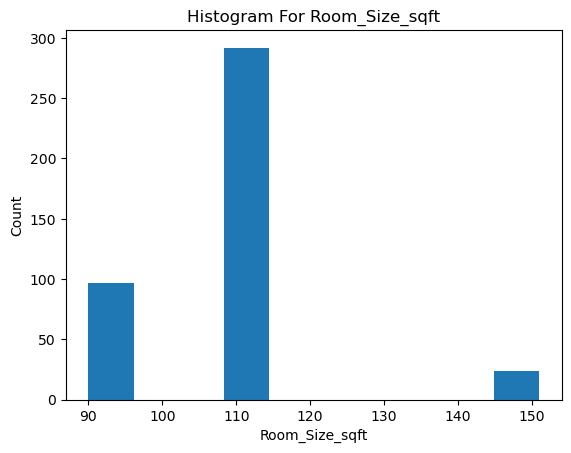

In [39]:
plt.hist(Data_Frame.Room_Size_sqft)
plt.xlabel('Room_Size_sqft')
plt.ylabel('Count')
plt.title('Histogram For Room_Size_sqft')

Text(0.5, 1.0, 'Histogram For Power_Consumption_kWh')

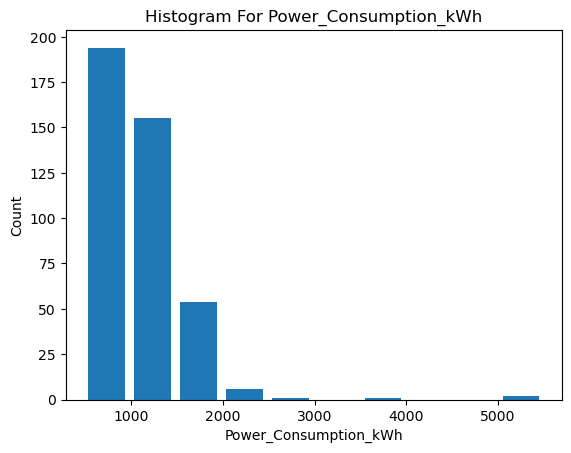

In [40]:
plt.hist(Data_Frame.Power_Consumption_kWh,rwidth=0.8)
plt.xlabel('Power_Consumption_kWh')
plt.ylabel('Count')
plt.title('Histogram For Power_Consumption_kWh')

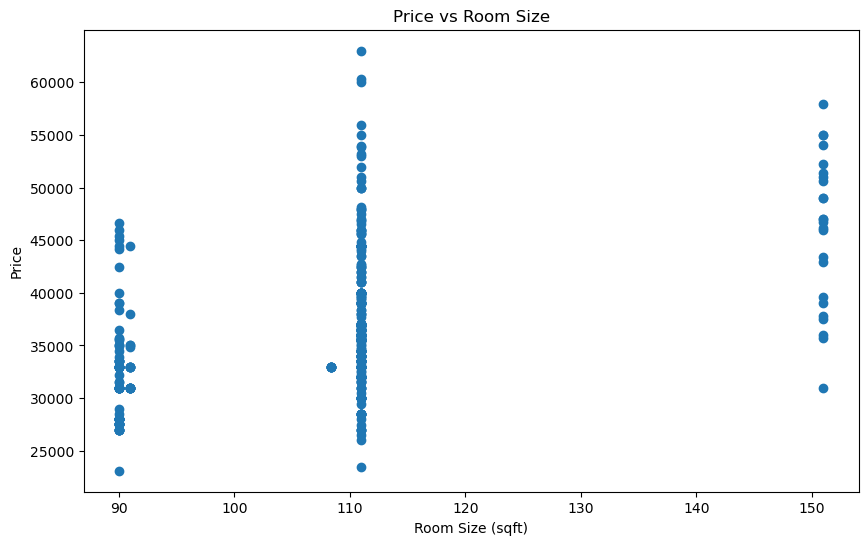

In [41]:

import matplotlib.pyplot as plt

# Assuming you have the data in a pandas DataFrame called 'ac_data'

# Bivariate scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(Data_Frame['Room_Size_sqft'], Data_Frame['Price'])
plt.title('Price vs Room Size')
plt.xlabel('Room Size (sqft)')
plt.ylabel('Price')
plt.show()



In [42]:
 # sns.heatmap(Data_Frame.corr(),annot = True)


In [43]:
Data_Frame[(Data_Frame['Rating']>4) ].sort_values("Price")

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
122,Lloyd,Lloyd 1 Ton 2 Star Window AC,808.0,90.0,1.0,23099,4.1,1.0
395,MarQ,MarQ by Flipkart 1 Ton 3 Star Split AC,1440.0,111.0,1.0,26490,4.2,1.0
256,Lloyd,Lloyd 0.8 Ton 3 Star Split Inverter AC,915.0,90.0,1.0,26999,4.2,0.8
352,Lloyd,Lloyd 0.8 Ton 3 Star Split Inverter AC,968.0,111.0,1.0,26999,4.2,0.8
212,Lloyd,Lloyd 0.8 Ton 3 Star Split Inverter AC,549.0,90.0,1.0,26999,4.2,0.8
...,...,...,...,...,...,...,...,...
31,LG,LG AI Convertible 6,1232.0,151.0,1.0,54990,4.1,2.0
79,LG,LG AI Convertible 6,1232.0,151.0,1.0,54990,4.1,2.0
339,Panasonic,Panasonic 2 Ton 3 Star Hot and Cold Split Inve...,1522.0,111.0,1.0,54990,4.1,2.0
247,Voltas,Voltas 2 Ton 5 Star Split Inverter AC,1002.0,151.0,1.0,57900,4.3,2.0


In [44]:
price_below_30k = Data_Frame[(Data_Frame['Rating']>4) & (Data_Frame['Price']<30000)]
#ACs having more than 4 stars & price below 30000

In [45]:
price_below_30k

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
1,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.0,90.0,1.0,27999,4.2,0.8
18,realme,realme TechLife 2023 Range 1 Ton 4 Star Split ...,965.0,90.0,1.0,27499,4.1,1.0
20,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
42,realme,realme TechLife 2023 Range 1 Ton 4 Star Split ...,965.0,90.0,1.0,27499,4.1,1.0
43,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.0,90.0,1.0,27999,4.2,0.8
44,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
67,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.0,90.0,1.0,27999,4.2,0.8
68,realme,realme TechLife 2023 Range 1 Ton 4 Star Split ...,965.0,90.0,1.0,27499,4.1,1.0
69,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
87,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.0,90.0,1.0,27999,4.2,0.8


In [46]:
price_below_40k = Data_Frame[(Data_Frame['Rating']>4) & (Data_Frame['Price']<40000)]
#ACs having more than 4 stars & price below 40000

In [47]:
price_below_40k 


,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
0,Blue,Blue Star Convertible 5 in 1 Cooling 2023 Mode...,1002.00,111.0,1.0,35490,4.2,1.5
1,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,521.00,90.0,1.0,27999,4.2,0.8
4,Lloyd,Lloyd 1.5 Ton 3 Star Split Inverter AC,1002.00,111.0,1.0,32990,4.3,1.5
5,Voltas,Voltas 1.5 Ton 5 Star Split Inverter AC,751.00,111.0,1.0,38999,4.2,1.5
6,Panasonic,Panasonic Convertible 7,1002.00,111.0,1.0,36490,4.3,1.5
...,...,...,...,...,...,...,...,...
403,Blue,Blue Star 1 Ton 3 Star Split Inverter AC,1450.00,90.0,1.0,34500,4.4,1.0
404,Lloyd,Lloyd 0.8 Ton 3 Star Split Inverter AC,1115.00,111.0,1.0,26999,4.2,0.8
405,Godrej,Godrej 1.5 Ton 3 Star Split Inverter AC,1695.00,111.0,1.0,37990,4.2,1.5
407,Blue,Blue Star 1.5 Ton 3 Star Split AC,1192.00,111.0,1.0,33990,4.4,1.5


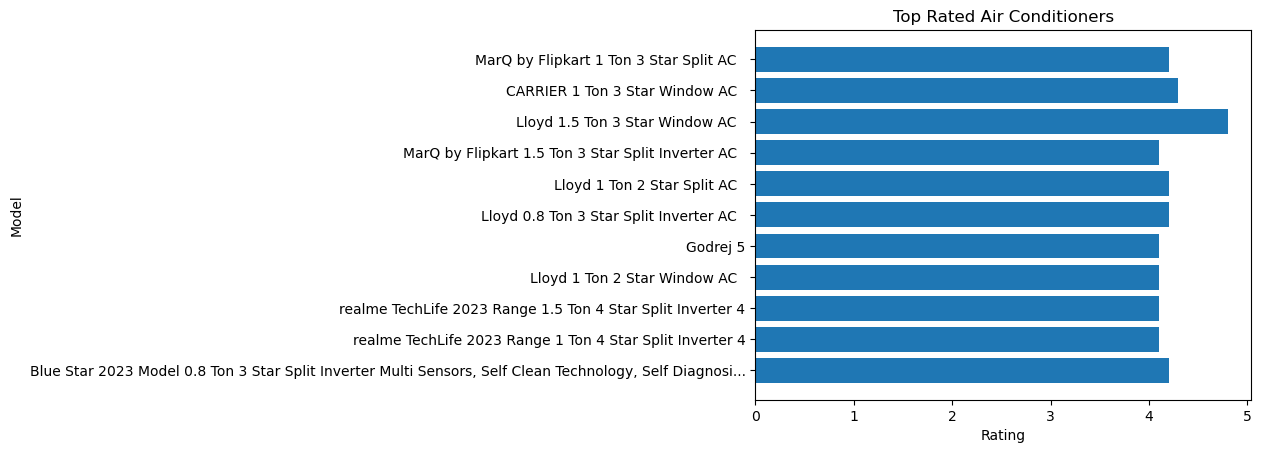

In [48]:
plt.barh(price_below_30k['Model'], price_below_30k['Rating'])
plt.xlabel('Rating')
plt.ylabel('Model')
plt.title('Top Rated Air Conditioners')
plt.show()

In [49]:
Data_Frame['Power_Consumption_kWh'].mean()

1103.2330266343827

In [50]:
Rating_price_power = Data_Frame[(Data_Frame['Rating']>4) & (Data_Frame['Price']<30000) & (Data_Frame['Power_Consumption_kWh']>1095)]
#ACs having more than 4 stars & price below 30000 &  power_Consumption_kwh less than 1095

In [51]:
Rating_price_power

,Brand,Model,Power_Consumption_kWh,Room_Size_sqft,Warranty_Years,Price,Rating,Ton
20,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
44,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
69,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
93,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
120,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
141,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
164,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
192,realme,realme TechLife 2023 Range 1.5 Ton 4 Star Spli...,1350.0,111.0,1.0,29999,4.1,1.5
249,MarQ,MarQ by Flipkart 1.5 Ton 3 Star Split Inverter...,1757.0,111.0,1.0,29990,4.1,1.5
252,Blue,Blue Star 2023 Model 0.8 Ton 3 Star Split Inve...,1835.0,90.0,1.0,27999,4.2,0.8


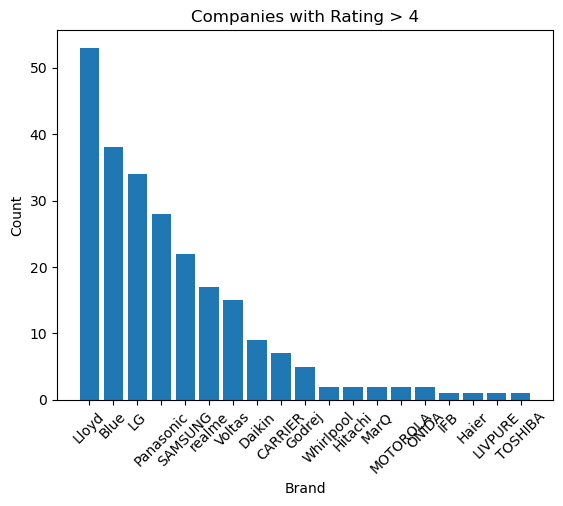

In [52]:
above_4_rating_companies = Data_Frame[Data_Frame['Rating'] > 4]['Brand'].value_counts()

plt.bar(above_4_rating_companies.index, above_4_rating_companies.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Companies with Rating > 4')
plt.xticks(rotation=45)
plt.show()

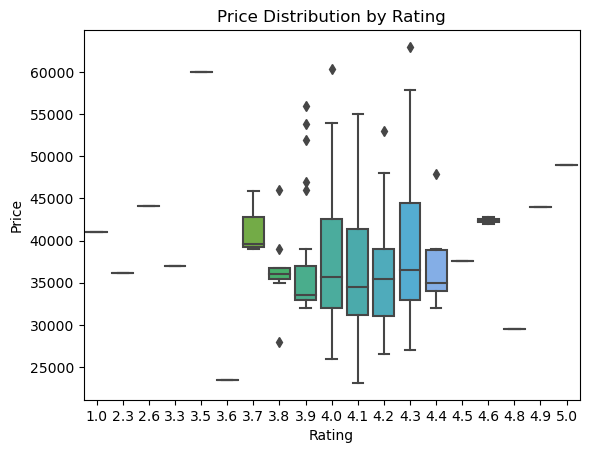

In [53]:
sns.boxplot(x=Data_Frame['Rating'], y=Data_Frame['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price Distribution by Rating')
plt.show()

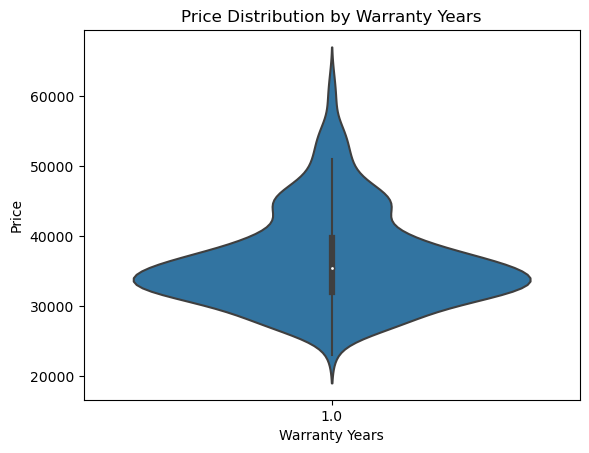

In [54]:
sns.violinplot(x=Data_Frame['Warranty_Years'], y=Data_Frame['Price'])
plt.xlabel('Warranty Years')
plt.ylabel('Price')
plt.title('Price Distribution by Warranty Years')
plt.show()

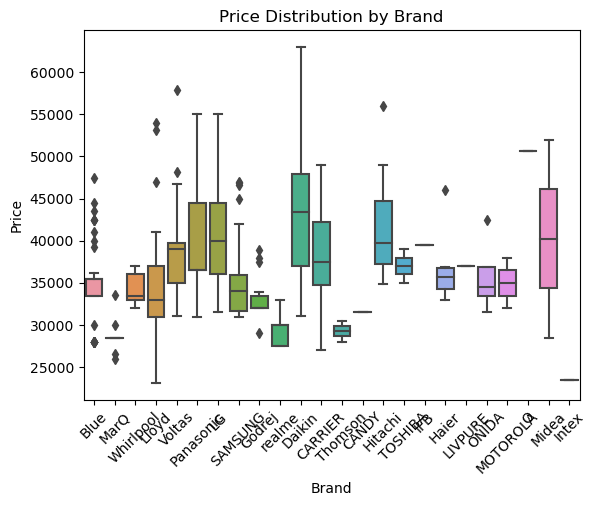

In [55]:
top_products = sns.boxplot(x=Data_Frame['Brand'], y=Data_Frame['Price'])
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.show()


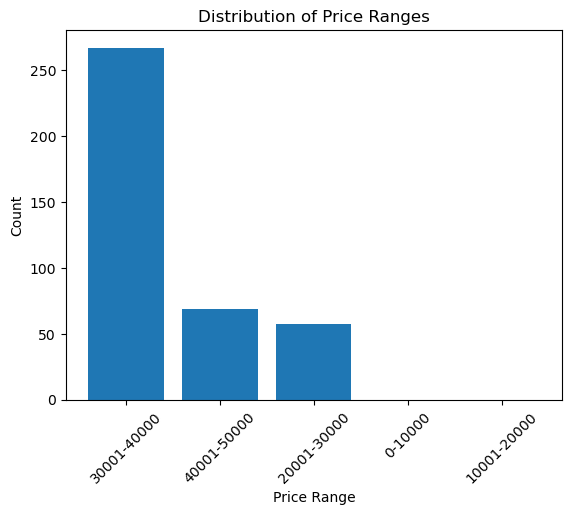

In [56]:
price_bins = [0, 10000, 20000, 30000, 40000, 50000]
labels = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000']

Data_Frame['Price Range'] = pd.cut(Data_Frame['Price'], bins=price_bins, labels=labels)
price_range_counts = Data_Frame['Price Range'].value_counts()

plt.bar(price_range_counts.index, price_range_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Ranges')
plt.xticks(rotation=45)
plt.show()

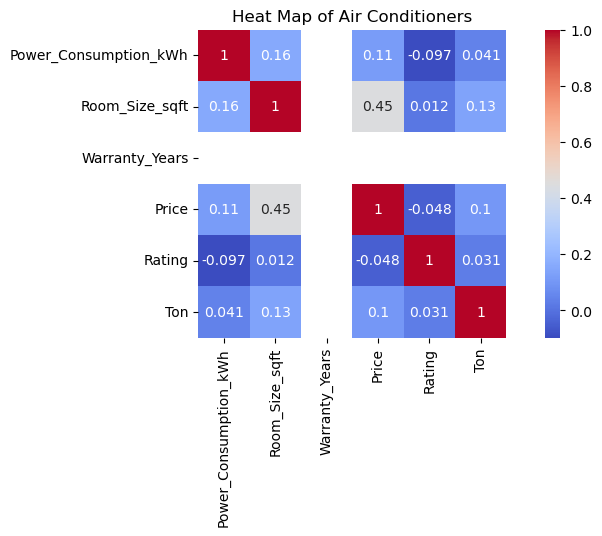

In [65]:

numerical_columns = ['Power_Consumption_kWh', 'Room_Size_sqft', 'Warranty_Years', 'Price', 'Rating', 'Ton']


correlation_matrix = Data_Frame[numerical_columns].corr()

# Creating the heat map
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Heat Map of Air Conditioners")
plt.show()